Online retail 
---

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


# task 1 prepare & clean
---

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from scipy import stats

In [124]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [92]:
from feature_engine.outliers import Winsorizer

In [121]:
import matplotlib.pyplot as plt

In [25]:
df_raw = pd.read_csv('/Users/natthakitngamcharoensin/Documents/projects/retail_store/online_retail_II.csv')

In [26]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


### find NaN rows

In [27]:
df_raw.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [28]:
df_raw[df_raw.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


### drop NaN CustomerID

In [29]:
df_new = df_raw.dropna().reset_index()
df_new = df_new.drop(columns='index')
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [30]:
df_new = df_new[df_new['Quantity'] > 0 ]
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 824363
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [32]:
df_new['total'] = df_new['Quantity'] * df_new['Price']
df_new.head()

/var/folders/j1/hmt_7d8j0p78qwrzkps1h50m0000gn/T/ipykernel_75649/2031328288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['total'] = df_new['Quantity'] * df_new['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [61]:
df_new = df_new.reset_index()
df_new = df_new.drop(columns=['index'])
df_new

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total,diff
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,738 days 05:05:00
...,...,...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 days 00:00:00


In [75]:
df_new.to_csv('/Users/natthakitngamcharoensin/Documents/projects/retail_store/edit_online_retail.csv')

# task2 Analyzed RFM model
---

### Monetary

In [33]:
monetary = df_new.groupby(['Customer ID'])['total'].sum()
monetary = pd.DataFrame(monetary).reset_index()
monetary

,Customer ID,total
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40
...,...,...
5876,18283.0,2736.65
5877,18284.0,461.68
5878,18285.0,427.00
5879,18286.0,1296.43


### frequency

In [34]:
frequency = df_new.groupby(['Customer ID'])['Invoice'].count()
frequency = pd.DataFrame(frequency).reset_index()
frequency.head()

,Customer ID,Invoice
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


### recency

In [ ]:
#turn to datetime dtype
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

In [ ]:
df_new['diff'] = df_new['InvoiceDate'].max() - df_new['InvoiceDate']

In [37]:
recency = df_new.groupby(['Customer ID'])['diff'].min()
recency = pd.DataFrame(recency).reset_index()
recency['diff'] = recency['diff'].dt.days
recency.head()

,Customer ID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


## merge 3 dataframe to rfm dataframe

In [38]:
rfm = pd.merge(monetary, recency, on='Customer ID', how='inner')
rfm = pd.merge(rfm, frequency, on='Customer ID', how='inner')
rfm

,Customer ID,total,diff,Invoice
0,12346.0,77556.46,325,34
1,12347.0,5633.32,1,253
2,12348.0,2019.40,74,51
3,12349.0,4428.69,18,175
4,12350.0,334.40,309,17
...,...,...,...,...
5876,18283.0,2736.65,3,986
5877,18284.0,461.68,431,28
5878,18285.0,427.00,660,12
5879,18286.0,1296.43,476,67


In [40]:
rfm_analysis = rfm[['total', 'diff', 'Invoice']]
rfm_analysis.columns = ['Monetary', 'Recency', 'Frequency']
rfm_analysis.head()

,Monetary,Recency,Frequency
0,77556.46,325,34
1,5633.32,1,253
2,2019.40,74,51
3,4428.69,18,175
4,334.40,309,17


## find distribution

In [100]:
#rfm_analysis = rfm_analysis.drop(columns=['cluster', 'Customer ID'])
#rfm_analysis.head()

,Monetary,Recency,Frequency
0,77556.46,325,34
1,5633.32,1,253
2,2019.40,74,51
3,4428.69,18,175
4,334.40,309,17


In [85]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

Recency's: Skew: 0.8865660455509762, : SkewtestResult(statistic=24.08915953264163, pvalue=3.247284820104879e-128)
Frequency's: Skew: 18.054009447156776, : SkewtestResult(statistic=97.13563048782531, pvalue=0.0)
Monetary's: Skew: 25.313728821893758, : SkewtestResult(statistic=105.79630693342664, pvalue=0.0)


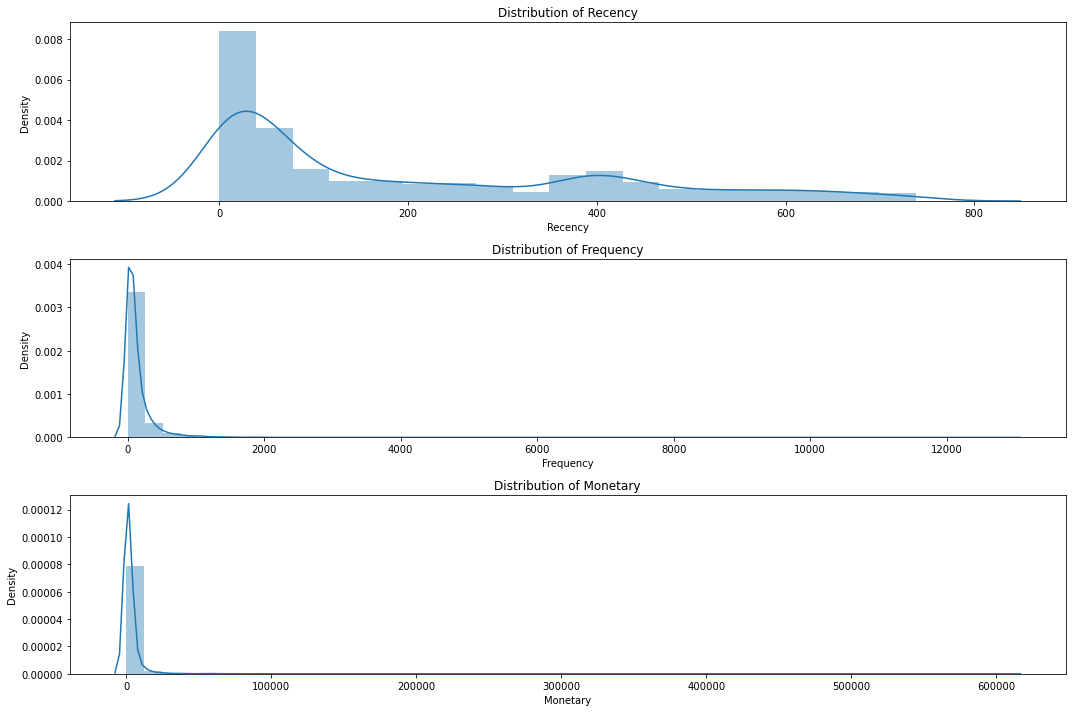

In [101]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
check_skew(rfm_analysis,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm_analysis,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm_analysis,'Monetary')

plt.tight_layout()

 *The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable. I added a small constant as log transformation demands all the values to be positive.*

In [102]:
df_rfm_log = rfm_analysis.copy()
df_rfm_log.head()

,Monetary,Recency,Frequency
0,77556.46,325,34
1,5633.32,1,253
2,2019.40,74,51
3,4428.69,18,175
4,334.40,309,17


/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

Recency's: Skew: -0.6176564954691034, : SkewtestResult(statistic=-17.878090970631956, pvalue=1.747176967945645e-71)
Frequency's: Skew: -0.029775436281285605, : SkewtestResult(statistic=-0.9331770796537797, pvalue=0.3507285468051904)
Monetary's: Skew: 0.20783978660602456, : SkewtestResult(statistic=6.44710966488764, pvalue=1.14003300361361e-10)


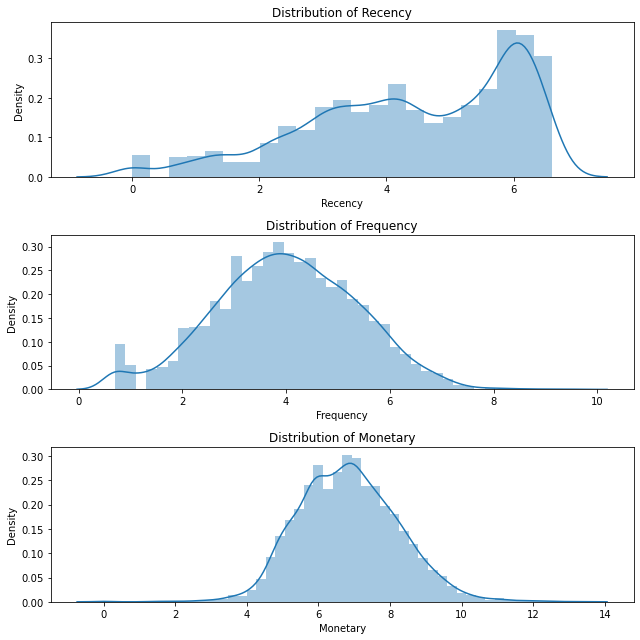

In [103]:
#add 1 
df_rfm_log = np.log(df_rfm_log + 1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [104]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [105]:
df_rfm_log = windsoriser.transform(df_rfm_log)

 *Once the skewness is reduced, I standardised the data by centring and scaling. Note all the variables now have a mean of 0 and a standard deviation of 1*

In [106]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

rfm_scaled = scaler.transform(df_rfm_log)

In [107]:
rfm_scaled = pd.DataFrame(rfm_scaled, columns=df_rfm_log.columns)
rfm_scaled.head()

,Monetary,Recency,Frequency
0,2.127999,0.858349,-0.338543
1,1.376973,-2.089720,1.162425
2,0.597833,-0.072749,-0.038729
3,1.194228,-0.942787,0.884607
4,-0.766392,0.826460,-0.842133


# task 3 find cluster by knn

In [108]:
#kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans = KMeans()
kmeans.fit(rfm_scaled)

KMeans()

In [109]:
kmeans.labels_

array([5, 7, 2, ..., 1, 5, 0], dtype=int32)

In [110]:
intertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_analysis)
    intertia_scores.append(kmeans.inertia_)

intertia_scores

[1277509880705.0684,
 488394161802.4037,
 236598574651.5369,
 133646535979.11877,
 82741725702.03651,
 47900510339.713936,
 33382666902.80735,
 26168939018.72543,
 20659852856.201366,
 17365716298.16485]

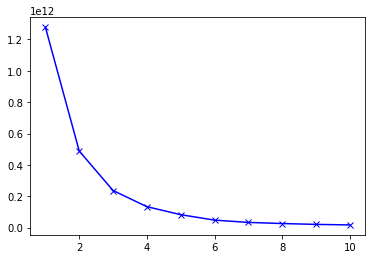

In [112]:
# n_cluster = 6
plt.plot(range(1,11), intertia_scores, 'bx-')

 *chosen 4 cluster*

In [113]:
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [114]:
kmeans.labels_

array([0, 2, 0, ..., 1, 0, 2], dtype=int32)

In [115]:
rfm_scaled.loc[:, 'Customer ID'] = rfm['Customer ID']
rfm_scaled

,Monetary,Recency,Frequency,Customer ID
0,2.127999,0.858349,-0.338543,12346.0
1,1.376973,-2.089720,1.162425,12347.0
2,0.597833,-0.072749,-0.038729,12348.0
3,1.194228,-0.942787,0.884607,12349.0
4,-0.766392,0.826460,-0.842133,12350.0
...,...,...,...,...
5876,0.828635,-1.930111,2.074120,18283.0
5877,-0.521985,1.036740,-0.480956,18284.0
5878,-0.581176,1.306251,-1.088577,18285.0
5879,0.261351,1.099529,0.164428,18286.0


 *add cluster column to identify any rows*

In [116]:
rfm_scaled['cluster'] = kmeans.labels_
rfm_scaled

,Monetary,Recency,Frequency,Customer ID,cluster
0,2.127999,0.858349,-0.338543,12346.0,0
1,1.376973,-2.089720,1.162425,12347.0,2
2,0.597833,-0.072749,-0.038729,12348.0,0
3,1.194228,-0.942787,0.884607,12349.0,2
4,-0.766392,0.826460,-0.842133,12350.0,1
...,...,...,...,...,...
5876,0.828635,-1.930111,2.074120,18283.0,2
5877,-0.521985,1.036740,-0.480956,18284.0,1
5878,-0.581176,1.306251,-1.088577,18285.0,1
5879,0.261351,1.099529,0.164428,18286.0,0


## **visualrized by scatter**

In [122]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/natthakitngamcharoensin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


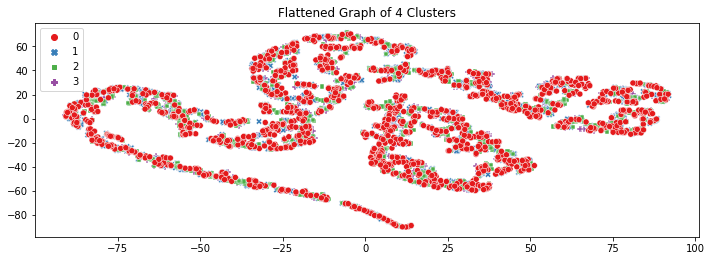

In [130]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(rfm_scaled, 4, rfm_analysis)

plt.tight_layout()

In [137]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=rfm_analysis.index, 
                                       columns=rfm_analysis.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        #id_vars=['Customer ID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

ValueError: Could not interpret input 'Cluster'

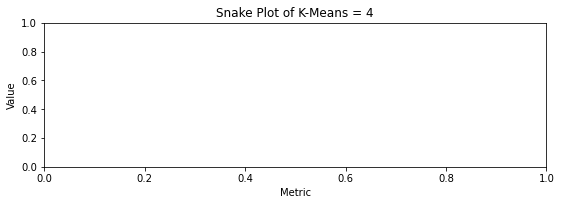

In [138]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(rfm_scaled, df_rfm_k4, rfm_analysis)

plt.tight_layout()

## **visualized by boxplot**

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

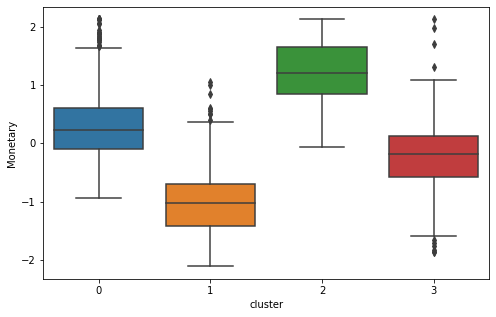

In [118]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='Monetary', data=rfm_scaled)

<AxesSubplot:xlabel='cluster', ylabel='Recency'>

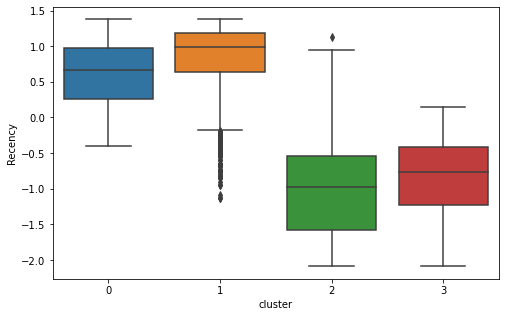

In [119]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='Recency', data=rfm_scaled)

<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

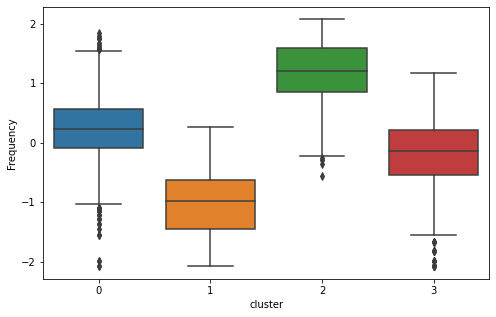

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='Frequency', data=rfm_scaled)

 **src : https://github.com/jasneekchugh/Customer-Segmentation-using-K-mean/blob/main/K-means%20clustering%20using%20RFM%20variables.ipynb**